# Co-aggregation and relative positioning

This is a tutorial on using various algorithms for exploring how different microbes are positioned relative to each other. 

There are three different functions for this:
`occupancy`: How much space does a channel (target) occupy at certain distances from another channel (focal).
`co_agg`: Co-aggregation of two strains. An undirected version of `occupancy`
`cross_ratio`: At each distance from a focal channel, what is the ratio between two target channels.

`occupancy` returns both the observed occupied space and a normalized version where 1 is equivalent the the expectation given random positioning. `co_agg` and `cross_ratio` only returns the normalized versions. For `co_agg` a CA value above 1 at a certain distance means that the channels (microbes) are positioned more at this distance than expected from random chance, and for CA values below 1 vice versa. For `cross_ratio` a CR value above 1 at some distance means that the ratio between the two target strains at that distance is higher than expected and vice versa.

### Load packages

In [1]:
library(RCon3D)
library(ggplot2)
library(rootSolve)

Warning message:
"package 'ggplot2' was built under R version 3.4.3"

### Find images

In [ ]:
img <- findIMG("/Data")

### Preparation
First we find out how many microns we can scan. It has to be a multiple of both zstep and pwidth.
When more microns are scanned runtime increases exponetially. Therefore, choose the lowest number of microns that is biologically meaningful, and increase them carefully if needed. Beware these functions can take some time to run.

In [3]:
pwidth <- 0.75
zstep <- 0.25
uniroot.all(function(x) x%%pwidth + x%%zstep,interval=c(0,30))

[1]  0.0  1.5  3.0  4.5  6.0  7.5  9.0 10.5 12.0 13.5 15.0 16.5 18.0 19.5 21.0
[16] 22.5 24.0 25.5 27.0 28.5 30.0

## Occupancy
`npixel` is the number of randomly chosen pixels for the estimation. `R` is the number of times to repeat the analysis. If the results are very different between the repeats you probably need more pixels. 

In [4]:
myocc <- occupancy(imgs=img,focal.channel="ste",target.channel="xan",
                   size=15,npixel=100,dstep=1,pwidth=0.75,zstep=0.25,R=5)

Starting run 1


  |                                                                      |   0%

Starting run 2


  |                                                                      |   0%

Starting run 3


  |                                                                      |   0%

Starting run 4


  |                                                                      |   0%

Starting run 5


  |                                                                      |   0%

#### Plot results
The red line is the actual proportion occupied, the black line is normalized such that random equals 1

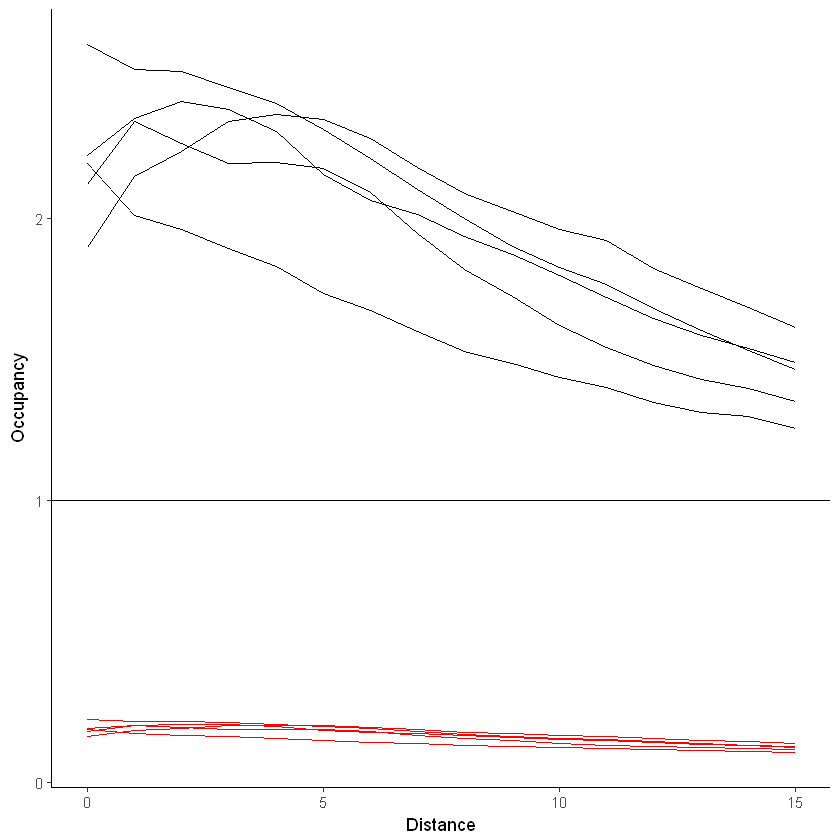

In [5]:
p <- ggplot(myocc,aes(x=Distance,y=Occupancy,group=R)) +
  theme_classic() +
  geom_hline(yintercept=1) +
  geom_line(colour="Red") +
  geom_line(data=myocc,aes(x=Distance,y=Occupancy.Normalized,group=R))
p

## Co-aggregation

In [6]:
mycc <- co_agg(imgs=img,channels=c("xan","ste"),size=15,npixel=100,dstep=1,pwidth=0.75,zstep=0.25,R=5)

Starting run 1


  |                                                                      |   0%

Starting run 2


  |                                                                      |   0%

Starting run 3


  |                                                                      |   0%

Starting run 4


  |                                                                      |   0%

Starting run 5


  |                                                                      |   0%

#### Plot the results

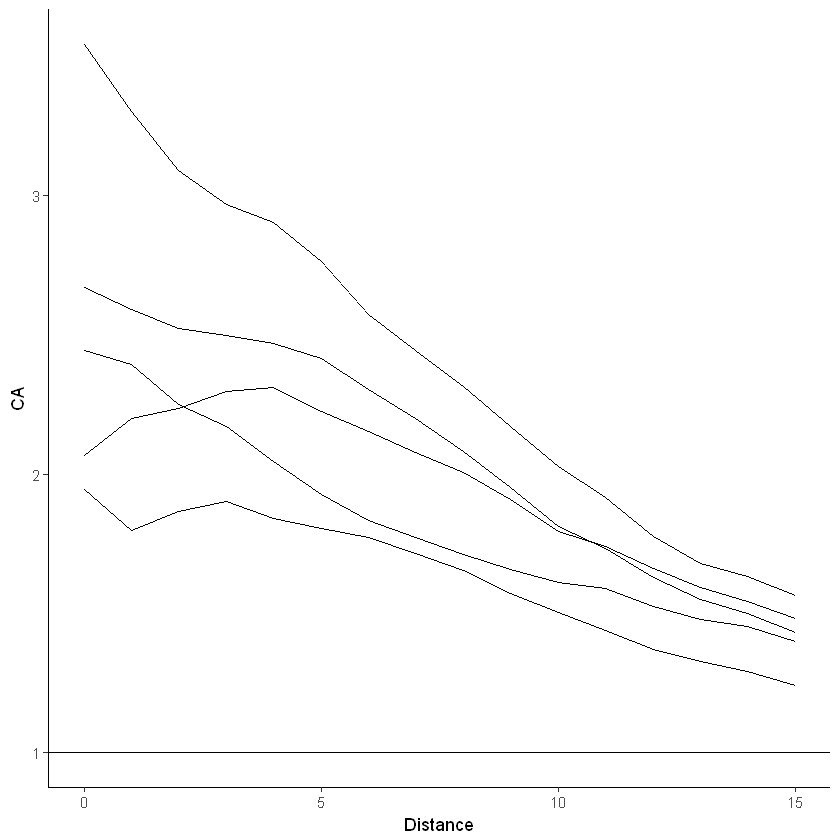

In [7]:
p <- ggplot(mycc,aes(x=Distance,y=CA,group=R)) +
  theme_classic() +
  geom_hline(yintercept=1) +
  geom_line() 
p

Aggregate the analytic repeats and plot again:

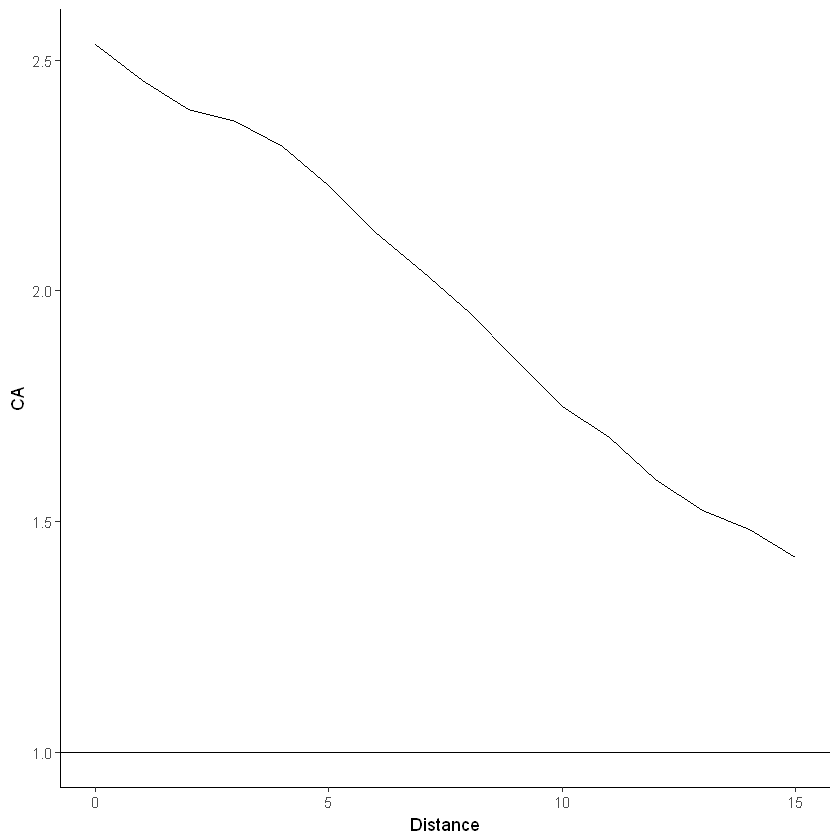

In [8]:
mycc2 <- aggregate(CA ~ ., data = mycc[,colnames(mycc) != "R"], FUN = mean)

p <- ggplot(mycc2,aes(x=Distance,y=CA)) +
  theme_classic() +
  geom_hline(yintercept=1) +
  geom_line()
p

At small distances "xan" and "ste" appear to be intermixed more than expected from random chance

## Cross-ratio
Lets find the ratio of "xan"/"pan" at different distances from "mic"

In [9]:
mycr <- cross_ratio(imgs=img,focal.channel="mic",target.channels=c("xan","pan"),size=15,npixel=100,dstep=1,pwidth=0.75,zstep=0.25,R=5)

Starting run 1


  |                                                                      |   0%

Starting run 2


  |                                                                      |   0%

Starting run 3


  |                                                                      |   0%

Starting run 4


  |                                                                      |   0%

Starting run 5


  |                                                                      |   0%

#### Plot the results

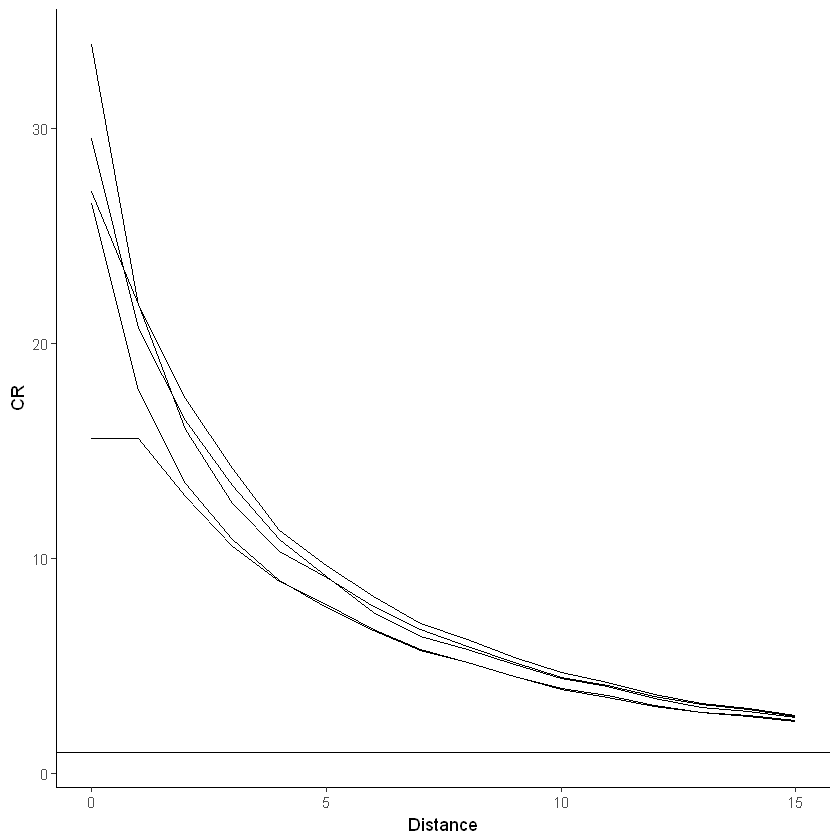

In [10]:
p <- ggplot(mycr,aes(x=Distance,y=CR,group=R)) +
  theme_classic() +
  geom_hline(yintercept=1) +
  geom_line() 
p

Close to "mic" we are more likely to find "xan" than "pan"

## Simulation

Lets simulate some random images and check that the algorithms work. Lets make an image with the dimensions 100x100x20. Two strains with the occupancies of 2% and 50% that are not allowed to overlap.

In [11]:
set.seed(1)
test <- create_random(getwd(), overlap = FALSE, side = 100, h = 20, probs = c(0.02,0.5))

#### Run the co-aggregation algorithm:

In [12]:
rand_ca <- co_agg(test, channels = c("Ch1","Ch2"), size = 5, npixel = 1000, R = 5, pwidth = 1, zstep = 1)

Starting run 1


  |                                                                      |   0%

Starting run 2


  |                                                                      |   0%

Starting run 3


  |                                                                      |   0%

Starting run 4


  |                                                                      |   0%

Starting run 5


  |                                                                      |   0%

#### Plot the results

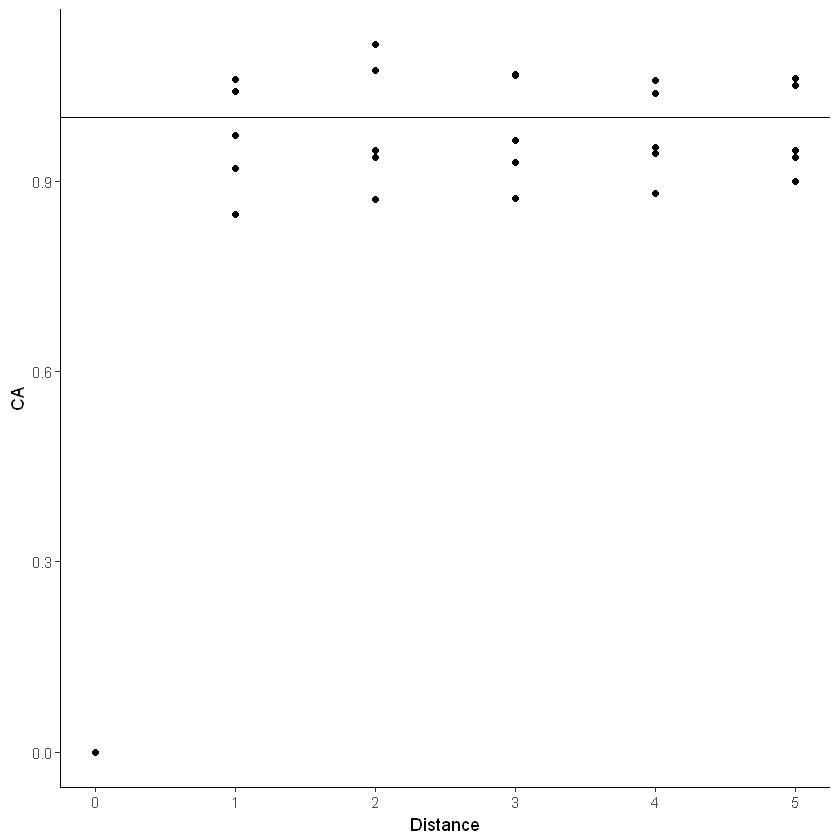

In [13]:
p <- ggplot(rand_ca, aes(Distance, CA)) +
  theme_classic() +
  geom_hline(yintercept = 1) +
  geom_point()
p

CA at distance 0 is 0 as expected (i.e. complete exclusion, they are simulated such that they don't overlap). At all other distances CA values are close to 1, corresponding to random positioning.